In [ ]:
# Importing all the basic and needful libraries to build the model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense , Dropout

In [ ]:
# Reading the dataset .
df = pd.read_csv("weatherAUS.csv")

In [ ]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
# getting the info of dataset with info function .
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [ ]:
# Checking for the null values present in the dataset .
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

**filling null values of object datatype with Mode .**

In [ ]:
df["WindGustDir"].fillna(df["WindGustDir"].mode()[0],inplace=True)

In [ ]:
df["WindDir9am"].fillna(df["WindDir9am"].mode()[0],inplace=True)

In [ ]:
df["WindDir3pm"].fillna(df["WindDir3pm"].mode()[0],inplace=True)

In [ ]:
df["RainToday"].fillna(df["RainToday"].mode()[0],inplace=True)

In [ ]:
df["RainTomorrow"].fillna(df["RainTomorrow"].mode()[0],inplace=True)

In [ ]:
# Filled the null values of object datatype columns with mode of that column .
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir          0
WindGustSpeed    10263
WindDir9am           0
WindDir3pm           0
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday            0
RainTomorrow         0
dtype: int64

In [ ]:
# Checking the binary distribution of target variable .
df["RainTomorrow"].value_counts()

No     113583
Yes     31877
Name: RainTomorrow, dtype: int64

In [ ]:
df["RainTomorrow"].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
# Droping some features who has more null values .
df.drop(columns = ["Evaporation","Sunshine","Date","Cloud9am","Cloud3pm"],inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  object 
 1   MinTemp        143975 non-null  float64
 2   MaxTemp        144199 non-null  float64
 3   Rainfall       142199 non-null  float64
 4   WindGustDir    145460 non-null  object 
 5   WindGustSpeed  135197 non-null  float64
 6   WindDir9am     145460 non-null  object 
 7   WindDir3pm     145460 non-null  object 
 8   WindSpeed9am   143693 non-null  float64
 9   WindSpeed3pm   142398 non-null  float64
 10  Humidity9am    142806 non-null  float64
 11  Humidity3pm    140953 non-null  float64
 12  Pressure9am    130395 non-null  float64
 13  Pressure3pm    130432 non-null  float64
 14  Temp9am        143693 non-null  float64
 15  Temp3pm        141851 non-null  float64
 16  RainToday      145460 non-null  object 
 17  RainTomorrow   145460 non-nul

In [ ]:
# Creating list of object datatype columns for label encoding .
obj_features = ["Location","WindGustDir","WindDir9am","WindDir3pm","RainToday"]

In [ ]:
# Importing Labelencoder for converting object variables to int .
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

In [ ]:
# Applying labelencoding with the help of loop on list created with object datatype columns .
for i in obj_features:
  df[i] = le.fit_transform(df[i])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  int64  
 1   MinTemp        143975 non-null  float64
 2   MaxTemp        144199 non-null  float64
 3   Rainfall       142199 non-null  float64
 4   WindGustDir    145460 non-null  int64  
 5   WindGustSpeed  135197 non-null  float64
 6   WindDir9am     145460 non-null  int64  
 7   WindDir3pm     145460 non-null  int64  
 8   WindSpeed9am   143693 non-null  float64
 9   WindSpeed3pm   142398 non-null  float64
 10  Humidity9am    142806 non-null  float64
 11  Humidity3pm    140953 non-null  float64
 12  Pressure9am    130395 non-null  float64
 13  Pressure3pm    130432 non-null  float64
 14  Temp9am        143693 non-null  float64
 15  Temp3pm        141851 non-null  float64
 16  RainToday      145460 non-null  int64  
 17  RainTomorrow   145460 non-nul

In [ ]:
df.isnull().sum()

Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
WindGustDir          0
WindGustSpeed    10263
WindDir9am           0
WindDir3pm           0
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Temp9am           1767
Temp3pm           3609
RainToday            0
RainTomorrow         0
dtype: int64

In [ ]:
# Filling the remaining null values present in dataset .
df["MinTemp"].fillna(df["MinTemp"].mean(),inplace=True)

In [ ]:
df["MaxTemp"].fillna(df["MaxTemp"].mean(),inplace=True)

In [ ]:
df["Rainfall"].fillna(df["Rainfall"].mean(),inplace=True)

In [ ]:
df["WindGustSpeed"].fillna(df["WindGustSpeed"].mean(),inplace=True)

In [ ]:
df["WindSpeed9am"].fillna(df["WindSpeed9am"].mean(),inplace=True)

In [ ]:
df["WindSpeed3pm"].fillna(df["WindSpeed3pm"].mean(),inplace=True)

In [ ]:
df["Humidity9am"].fillna(df["Humidity9am"].mean(),inplace=True)

In [ ]:
df["Humidity3pm"].fillna(df["Humidity3pm"].mean(),inplace=True)

In [ ]:
df["Pressure9am"].fillna(df["Pressure9am"].mean(),inplace=True)

In [ ]:
df["Pressure3pm"].fillna(df["Pressure3pm"].mean(),inplace=True)

In [ ]:
df["Temp9am"].fillna(df["Temp9am"].mean(),inplace=True)

In [ ]:
df["Temp3pm"].fillna(df["Temp3pm"].mean(),inplace=True)

In [ ]:
df.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  int64  
 1   MinTemp        145460 non-null  float64
 2   MaxTemp        145460 non-null  float64
 3   Rainfall       145460 non-null  float64
 4   WindGustDir    145460 non-null  int64  
 5   WindGustSpeed  145460 non-null  float64
 6   WindDir9am     145460 non-null  int64  
 7   WindDir3pm     145460 non-null  int64  
 8   WindSpeed9am   145460 non-null  float64
 9   WindSpeed3pm   145460 non-null  float64
 10  Humidity9am    145460 non-null  float64
 11  Humidity3pm    145460 non-null  float64
 12  Pressure9am    145460 non-null  float64
 13  Pressure3pm    145460 non-null  float64
 14  Temp9am        145460 non-null  float64
 15  Temp3pm        145460 non-null  float64
 16  RainToday      145460 non-null  int64  
 17  RainTomorrow   145460 non-nul

In [ ]:
df["RainTomorrow"] = le.fit_transform(df["RainTomorrow"])

In [ ]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2,13.4,22.9,0.6,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0
1,2,7.4,25.1,0.0,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0
2,2,12.9,25.7,0.0,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0
3,2,9.2,28.0,0.0,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0
4,2,17.5,32.3,1.0,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0


In [ ]:
# splitting data into input features and output feature

x = df.iloc[:,:-1].values
x

array([[ 2.        , 13.4       , 22.9       , ..., 16.9       ,
        21.8       ,  0.        ],
       [ 2.        ,  7.4       , 25.1       , ..., 17.2       ,
        24.3       ,  0.        ],
       [ 2.        , 12.9       , 25.7       , ..., 21.        ,
        23.2       ,  0.        ],
       ...,
       [41.        ,  5.4       , 26.9       , ..., 12.5       ,
        26.1       ,  0.        ],
       [41.        ,  7.8       , 27.        , ..., 15.1       ,
        26.        ,  0.        ],
       [41.        , 14.9       , 23.22134828, ..., 15.        ,
        20.9       ,  0.        ]])

In [ ]:
y = df["RainTomorrow"].values
y

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

In [ ]:
# performing feature scaling to scale down the values .
from sklearn.preprocessing import  StandardScaler

In [ ]:
sc = StandardScaler()

In [ ]:
# Appling feature scaling on trainging and testing data of input fratures .
xtrain=sc.fit_transform(xtrain)
xtest=sc.transform(xtest)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [ ]:
# Building an ANN Model on dataset

ann = Sequential()

In [ ]:
ann.add(Dense(units=128,activation="relu"))
ann.add(Dropout(rate = 0.2))

ann.add(Dense(units=100,activation="relu"))
ann.add(Dropout(rate = 0.2))

ann.add(Dense(units=1,activation="sigmoid"))

In [ ]:
ann.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
ann.fit(xtrain,ytrain,epochs=300,validation_data=(xtest, ytest),verbose=1,batch_size=1000,callbacks=[early_stop])

Epoch 1/300
102/102 [==============================] - 5s 35ms/step - loss: 0.5338 - accuracy: 0.7792 - val_loss: 0.4800 - val_accuracy: 0.7910
Epoch 2/300
102/102 [==============================] - 2s 22ms/step - loss: 0.4715 - accuracy: 0.7931 - val_loss: 0.4376 - val_accuracy: 0.8136
Epoch 3/300
102/102 [==============================] - 2s 21ms/step - loss: 0.4404 - accuracy: 0.8068 - val_loss: 0.4154 - val_accuracy: 0.8223
Epoch 4/300
102/102 [==============================] - 2s 21ms/step - loss: 0.4235 - accuracy: 0.8140 - val_loss: 0.4028 - val_accuracy: 0.8280
Epoch 5/300
102/102 [==============================] - 2s 22ms/step - loss: 0.4135 - accuracy: 0.8192 - val_loss: 0.3946 - val_accuracy: 0.8310
Epoch 6/300
102/102 [==============================] - 3s 26ms/step - loss: 0.4072 - accuracy: 0.8214 - val_loss: 0.3891 - val_accuracy: 0.8322
Epoch 7/300
102/102 [==============================] - 2s 18ms/step - loss: 0.4030 - accuracy: 0.8243 - val_loss: 0.3853 - val_accuracy:

In [ ]:
ann.history.history

{'loss': [0.5337765216827393,
  0.4715084433555603,
  0.4404360353946686,
  0.4235411584377289,
  0.41352951526641846,
  0.4071599543094635,
  0.4030168354511261,
  0.4004335105419159,
  0.39745432138442993,
  0.39497822523117065,
  0.3944602310657501,
  0.39223888516426086,
  0.3911304771900177,
  0.39041438698768616,
  0.3902706503868103,
  0.38759925961494446,
  0.3879943788051605,
  0.3866078853607178,
  0.3861214816570282,
  0.3854904770851135,
  0.3854711949825287,
  0.3852497339248657,
  0.3846254348754883,
  0.3834248483181,
  0.38319867849349976,
  0.382927268743515,
  0.382790744304657,
  0.3826231360435486,
  0.3819969594478607,
  0.3807067275047302,
  0.38109293580055237,
  0.38050365447998047,
  0.38066524267196655,
  0.3801833689212799,
  0.37990984320640564,
  0.3799642324447632,
  0.3799948990345001,
  0.3792836666107178,
  0.37904050946235657,
  0.3785269558429718,
  0.3795078694820404,
  0.37821558117866516,
  0.3781466484069824,
  0.3786952793598175,
  0.378436714410

<Axes: >

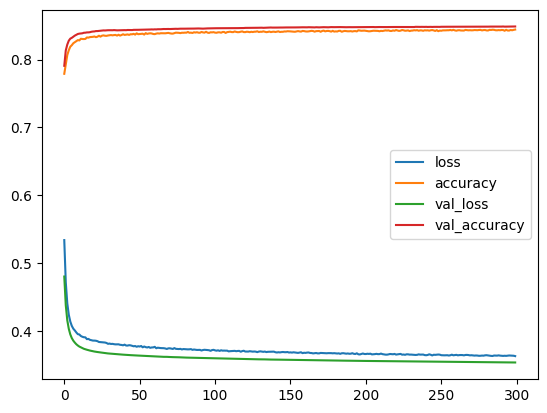

In [ ]:
lossdf=pd.DataFrame(ann.history.history)
lossdf.plot()

In [ ]:
ypred=ann.predict(xtest)
ypred=ypred>0.5

1364/1364 [==============================] - 2s 1ms/step


In [ ]:
# For evaluation purpose importing classification report .
from sklearn.metrics import classification_report


In [ ]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91     34215
           1       0.72      0.50      0.59      9423

    accuracy                           0.85     43638
   macro avg       0.79      0.72      0.75     43638
weighted avg       0.84      0.85      0.84     43638

